# Notebook for the analysis of XPS data 

Analysis of `dati/Coin_Mg_50V_fullspctra.csv`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from arpes.io import load_data
import xarray as xr


/Users/a129544/anaconda3/envs/XPS/lib/python3.8/site-packages/arpes/config.py:54: UserWarning: Could not find local configuration file. If you don't have one, you can safely ignore this message.
  warnings.warn(msg)


Activating auto-logging. Current session state plus future input saved.
Filename       : logs/unnamed_2023-06-16_17-26-56.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


In [2]:
def load_csv_datatype(path_to_file: str = None, 
                      df = None,
                      n_scans: int= 1,
                      energy_key: str = 'Energy(meas)',
                      dim_name: str = 'eV') -> xr.DataArray:
    """
    This function load a dataset in the csv format using pandas.
    the number of scans need to be manually insered. 
    If multiple scans are present the mean is considered 
    """
    if path_to_file is not None:
        df = pd.read_csv(path_to_file, skiprows=1, sep='\t')
    elif df is not None:
        df=df
    else:
        print('One of path_to_file or df need to be specified')
        return 0

    scan_list = [f'Scan{i}' for i in range(1,n_scans+1)]
    loaded_data = df[scan_list].mean(axis=1).to_numpy()
    
    #loaded_data = [df[key].to_numpy().T for key in scan_list]

    coords = {dim_name : df[energy_key].to_numpy()}

    return xr.DataArray(
        loaded_data,
        coords=coords,
        dims=dim_name,
        # attrs={...} <- attributes here
    )

# Load datas 
In  order to load the datas and to insert them in the `xr.DataArray` object we use a custom function. 
First we analyze the datas importing them with pandas, then we can load them using the function `load_csv_datatype`. This function allow to load datas in the correct format for the successives analysis.

In [3]:
data_path_1 = 'dati/Coin_Mg_50V_fullspctra.csv'
data_path_2 = 'dati/Coin_Al_50V_fullspctra.csv'


df_Mg = pd.read_csv(data_path_1, skiprows=1, sep='\t')
df_Al = pd.read_csv(data_path_2, skiprows=1, sep='\t')
df_Mg

,Energy(calc),Energy(meas),Sum,Scan1
0,1300.0,1285.60,925,925
1,1299.5,1285.45,822,822
2,1299.0,1285.46,886,886
3,1298.5,1284.87,787,787
4,1298.0,1284.28,863,863
...,...,...,...,...
2196,202.0,201.02,1939,1939
2197,201.5,200.42,2030,2030
2198,201.0,200.45,1989,1989
2199,200.5,199.81,1980,1980


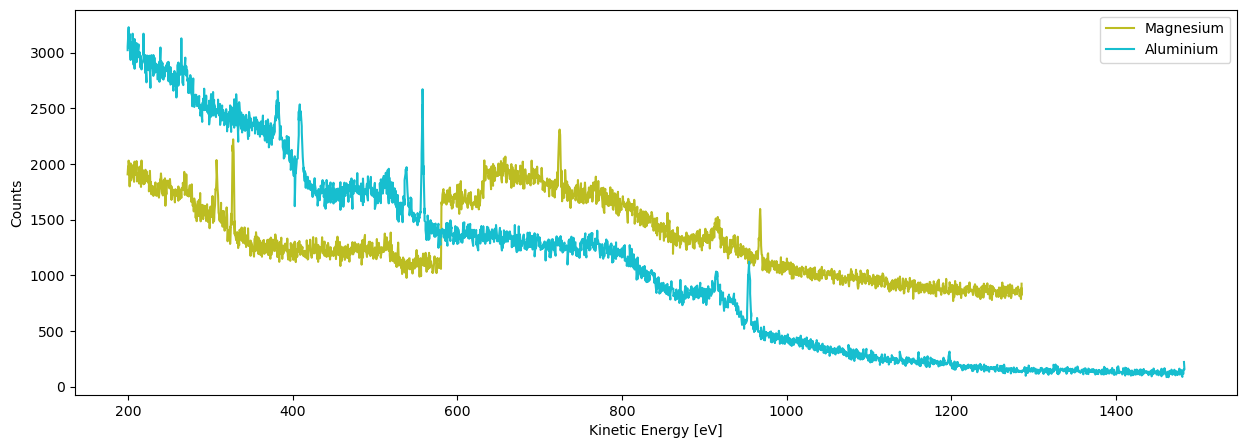

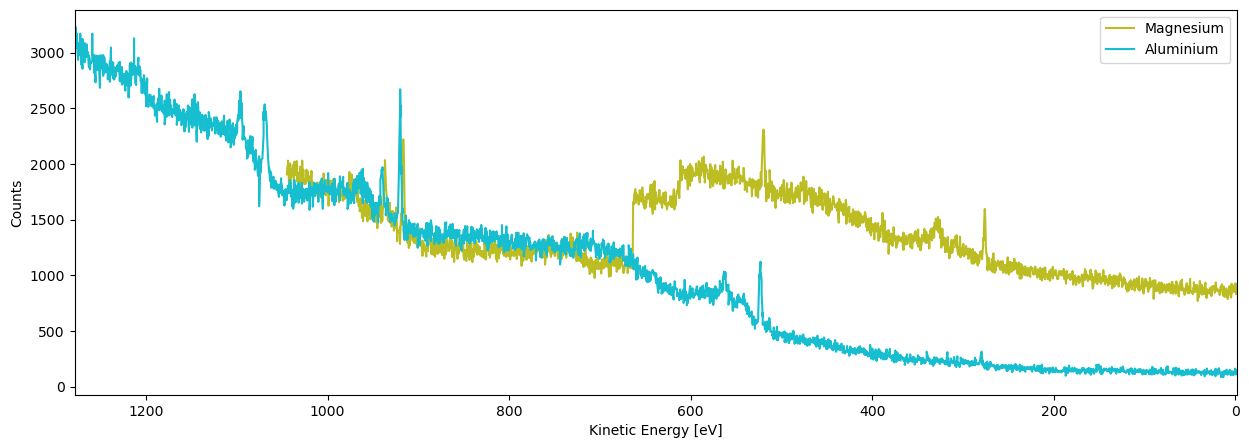

In [17]:
fermi_energy_Mg = 1244.00000 #+/- 7.18180244
fermi_energy_Al = 1477.61674 #+/- 0.50422479

df_Al['BindingEnergy'] = fermi_energy_Al - df_Al['Energy(meas)']
df_Mg['BindingEnergy'] = fermi_energy_Mg - df_Mg['Energy(meas)']

fig = plt.figure(figsize=(15,5))

plt.plot(df_Mg['Energy(meas)'], df_Mg['Scan1'], label='Magnesium', c='tab:olive')
plt.plot(df_Al['Energy(meas)'], df_Al['Scan1'], label='Aluminium', c='tab:cyan')

plt.xlabel('Kinetic Energy [eV]')
plt.ylabel('Counts')
plt.legend()
plt.show()

fig = plt.figure(figsize=(15,5))

plt.plot(df_Mg['BindingEnergy'], df_Mg['Scan1'], label='Magnesium', c='tab:olive')
plt.plot(df_Al['BindingEnergy'], df_Al['Scan1'], label='Aluminium', c='tab:cyan')
plt.xlim(df_Al['BindingEnergy'].max(), -2)  # decreasing time
plt.xlabel('Kinetic Energy [eV]')
plt.ylabel('Counts')
plt.legend()
plt.show()